In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv("LoanPrediction.csv")  
df = pd.read_csv("LoadPredTrain.csv")  

df.fillna(method='ffill', inplace=True)

le = LabelEncoder()
for col in df.select_dtypes(include=['object']).columns:
    df[col] = le.fit_transform(df[col])


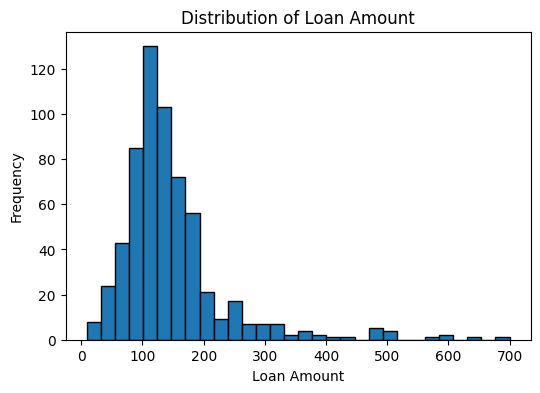

In [10]:
plt.figure(figsize=(6, 4))
plt.hist(df['LoanAmount'], bins=30, edgecolor='black')
plt.title("Distribution of Loan Amount")
plt.xlabel("Loan Amount")
plt.ylabel("Frequency")
plt.show()

C:\Users\iyusr\AppData\Local\Temp\ipykernel_25580\4113983072.py:4: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(edu_groups, labels=edu_categories)


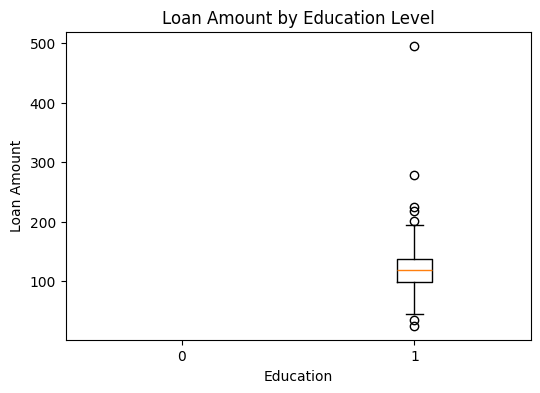

In [11]:
plt.figure(figsize=(6, 4))
edu_categories = df['Education'].unique()
edu_groups = [df[df['Education'] == cat]['LoanAmount'] for cat in edu_categories]
plt.boxplot(edu_groups, labels=edu_categories)
plt.title("Loan Amount by Education Level")
plt.xlabel("Education")
plt.ylabel("Loan Amount")
plt.show()

In [13]:
import pandas as pd

df = pd.read_csv("LoadPredTrain.csv")

print("Missing values before:\n", df.isnull().sum())

numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(include='object').columns

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing values after:\n", df.isnull().sum())

Missing values before:
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Missing values after:
 Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # scale the full dataset

# Now split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train logistic regression
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Step 1: Load data
df = pd.read_csv("LoadPredTrain.csv")

# Step 2: Handle missing values
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].mean(), inplace=True)

for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Step 3: Label encode all categorical columns
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Step 4: Define features and target
X = df.drop(['Loan_ID', 'Loan_Status'], axis=1)
y = df['Loan_Status']

# Step 5: Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Step 6: Train improved Decision Tree model
model = DecisionTreeClassifier(
    max_depth=5,               # prevents overfitting
    min_samples_split=4,       # more robust splits
    min_samples_leaf=2,        # no tiny leaf nodes
    criterion='entropy',       # better for imbalanced data
    random_state=42
)

model.fit(X_train, y_train)

# Step 7: Predict and evaluate
y_pred = model.predict(X_test)

print("✅ Improved Decision Tree Results:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Improved Decision Tree Results:
Accuracy: 0.7317073170731707
Confusion Matrix:
 [[15 28]
 [ 5 75]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.35      0.48        43
           1       0.73      0.94      0.82        80

    accuracy                           0.73       123
   macro avg       0.74      0.64      0.65       123
weighted avg       0.74      0.73      0.70       123



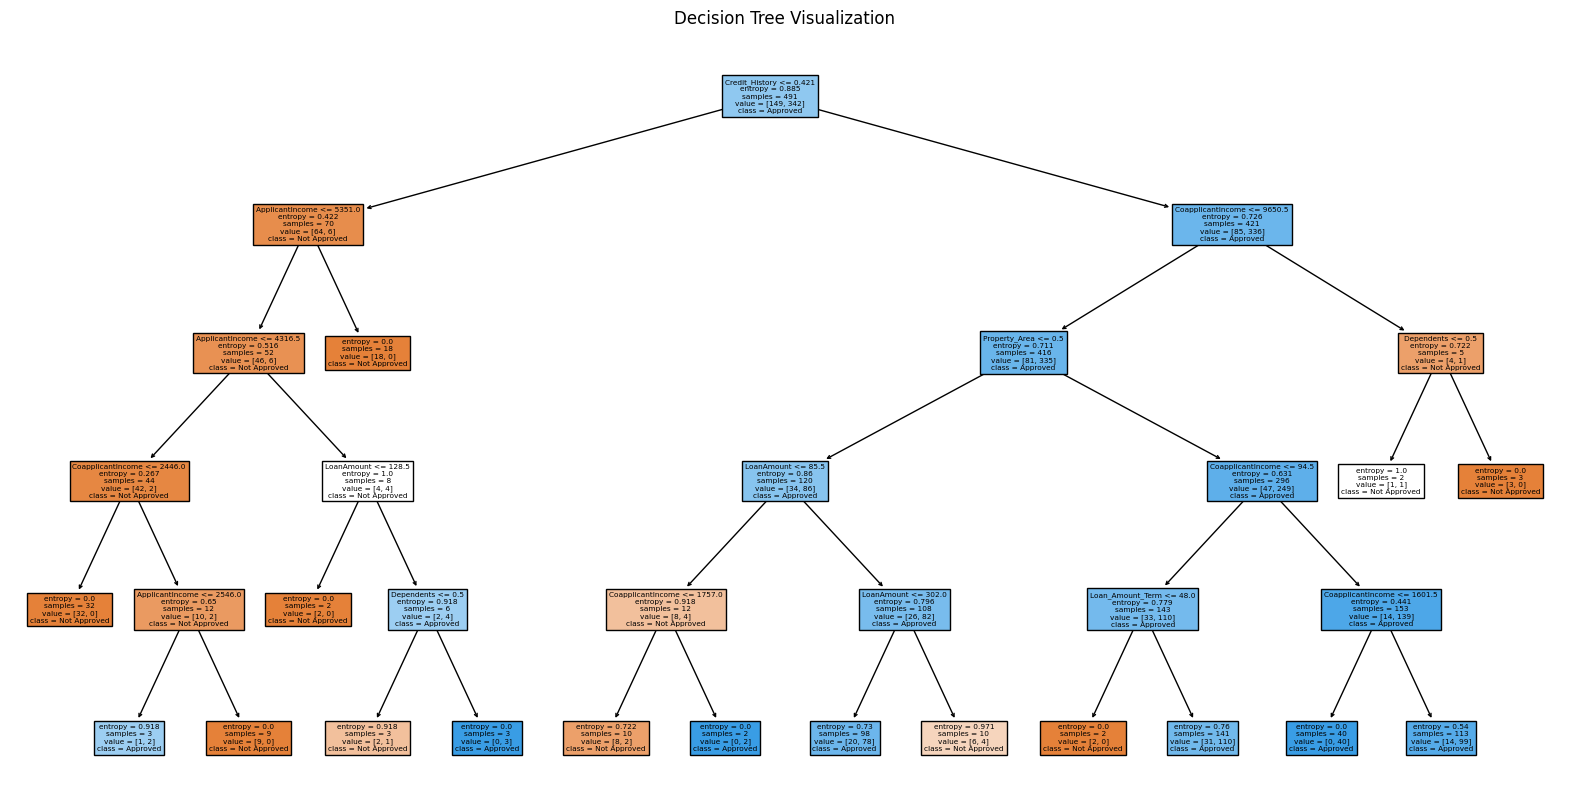

Class Distribution in Target Variable:
1    422
0    192
Name: Loan_Status, dtype: int64


In [34]:
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=features, class_names=["Not Approved", "Approved"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

print("Class Distribution in Target Variable:")
print(y.value_counts())